**Proyecto Tutorial de Clasficador de Imagenes**
- Comprender un dataset nuevo.
- Modelar los datos utilizando una RNA.
- Analizar los resultados y optimizar el modelo.

**🌱 Cómo iniciar este proyecto**
Sigue las siguientes instrucciones:

- Crea un nuevo repositorio basado en el proyecto de Machine Learning o haciendo clic aquí.
- Abre el repositorio creado recientemente en Codespace usando la extensión del botón de Codespace.
- Una vez que el VSCode del Codespace haya terminado de abrirse, comienza tu proyecto siguiendo las instrucciones a continuación.

**🚛 Cómo entregar este proyecto**
Una vez que hayas terminado de resolver el caso práctico, asegúrate de confirmar tus cambios, haz push a tu repositorio y ve a 4Geeks.com para subir el enlace del repositorio.

**📝 Instrucciones**

**Sistema de clasificación de imágenes**
El conjunto de datos se compone de fotos de perros y gatos proporcionadas como un subconjunto de fotos de uno mucho más grande de 3 millones de fotos anotadas manualmente. Estos datos se obtuvieron a través de una colaboración entre Petfinder.com y Microsoft.

El conjunto de datos se usó originalmente como un CAPTCHA, es decir, una tarea que se cree que un humano encuentra trivial, pero que una máquina no puede resolver, que se usa en sitios web para distinguir entre usuarios humanos y bots. La tarea se denominó "Asirra". Cuando se presentó "Asirra", se mencionó "que los estudios de usuarios indican que los humanos pueden resolverlo el 99,6% de las veces en menos de 30 segundos". A menos que se produzca un gran avance en la visión artificial, esperamos que los ordenadores no tengan más de 1/54.000 posibilidades de resolverlo.

En el momento en que se publicó la competencia, el resultado de última generación se logró con un SVM y se describió en un artículo de 2007 con el título "Ataques de Machine Learning contra el CAPTCHA de Asirra" (PDF) que logró una precisión de clasificación del 80%. Fue este documento el que demostró que la tarea ya no era una tarea adecuada para un CAPTCHA poco después de que se propusiera la tarea.

**Paso 1: Carga del conjunto de datos**
El conjunto de datos se encuentra en este link. Descarga la carpeta y descomprime los archivos. Ahora tendrás una carpeta con el dataset y una carpeta llamada train que contiene más de 25.000 archivos de imagen (formato .jpg) de perros y gatos. Las fotos están etiquetadas por su nombre de archivo, con la palabra dog o cat.

**Paso 2: Visualiza la información de entrada**
El primer paso cuando nos enfrentamos a un problema de clasificación de imágenes es obtener toda la información posible a través de ellas. Por lo tanto, carga e imprime las primeras nueve fotos de perros en una sola figura. Repite lo mismo para los gatos. Puedes ver que las fotos son a color y tienen diferentes formas y tamaños.

Esta variedad de tamaños y formatos debe solucionarse antes de entrenar el modelo. Asegúrate de que todas tengan un tamaño fijo de 200x200 píxeles.

Como podrás ver, son una gran cantidad de imágenes, asegúrate de seguir las siguientes normas:

Si tienes más de 12 gigabytes de RAM, usa la API de procesamiento de imágenes de Keras para cargar las 25.000 fotos en el conjunto de datos de entrenamiento y remodelarlas a fotos cuadradas de 200×200 píxeles. La etiqueta también debe determinarse para cada foto en función de los nombres de archivo. Se debe guardar una tupla de fotos y etiquetas.

Si no tienes más de 12 gigabytes de RAM, carga las imágenes progresivamente usando la clase Keras ImageDataGenerator y la función flow_from_directory(). Esto será más lento de ejecutar, pero se ejecutará en hardware de menor capacidad. Esta función prefiere que los datos se dividan en directorios train y test separados, y debajo de cada directorio para tener un subdirectorio para cada clase.

Una vez tengas todas las imágenes procesadas, crea un objeto ImageDataGenerator para datos de entrenamiento y prueba. Luego pasa la carpeta que tiene datos de entrenamiento al objeto trdata y, de manera similar, pasa la carpeta que tiene datos de prueba al objeto tsdata. De esta forma, se etiquetarán las imágenes automáticamente y estará todo listo para entrar a la red.

**Paso 3: Construye una RNA**
Cualquier clasificador que se ajuste a este problema tendrá que ser robusto porque algunas imágenes muestran al gato o al perro en una esquina o tal vez a 2 gatos o perros en la misma foto. Si has podido investigar algunas de las implementaciones de los ganadores de otras competiciones también relacionadas con imágenes, verás que VGG16 es una arquitectura de CNN utilizada para ganar la competencia de Kaggle ILSVR (Imagenet) en 2014. Se considera una de las arquitecturas de modelos de visión con mejores resultados hasta la fecha.

Utiliza la siguiente arquitectura de prueba:

model = Sequential()

model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

model.add(Flatten())

model.add(Dense(units = 4096,activation = "relu"))

model.add(Dense(units = 4096,activation = "relu"))

model.add(Dense(units = 2, activation = "softmax"))

El código anterior aplica convoluciones a los datos (capas Conv2D y MaxPool2D) y después aplica capas densas (capas Dense) para el procesamiento de los valores numéricos obtenidos tras las convoluciones.

A continuación añade los elementos restantes para conformar el modelo, entrénalo y mide su rendimiento.

**Paso 4: Optimiza el modelo anterior**
Importa el método ModelCheckpoint y EarlyStopping de Keras. Crea un objeto de ambos y pásalo como funciones callback a fit_generator.

Carga el mejor modelo de los anteriores y utiliza el conjunto de test para hacer predicciones.

**Paso 5: Guarda el modelo**
Almacena el modelo en la carpeta correspondiente.

### Imports

In [3]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.utils import load_img, img_to_array
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Dropout, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.python.client import device_lib

ModuleNotFoundError: No module named 'tensorflow'

### Paso 1: Fijamos nuestra seed

In [41]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)



### Paso2: Visualizamos las primeras 9 imagenes de Cats y de Dogs

#### Dogs

In [ ]:
data_dir= r"..\data\Train"

In [43]:
dog_subfolder = os.path.join(data_dir, "Dogs")

In [44]:
dog_image_files = os.listdir(dog_subfolder)

In [45]:
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

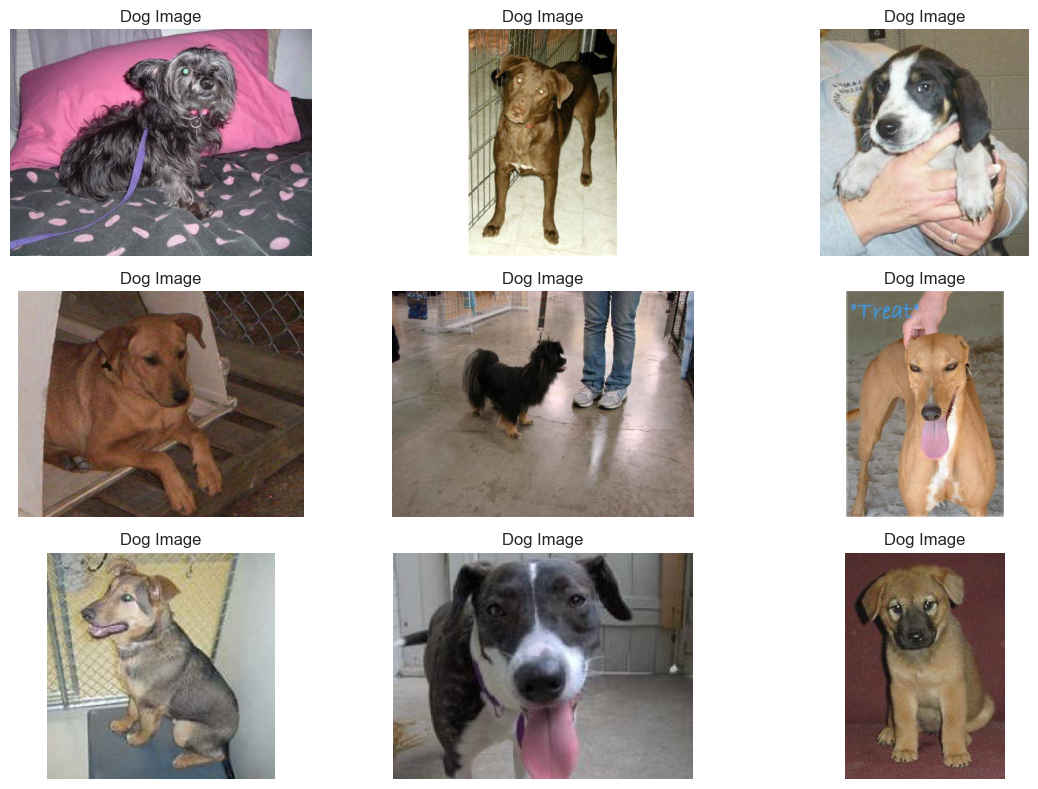

In [46]:
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

#### Cats

In [ ]:
data_dir = r"..\data\Train"

In [48]:
cats_subfolder = os.path.join(data_dir, "Cats")

In [49]:
cats_image_files = os.listdir(cats_subfolder)

In [50]:
# Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

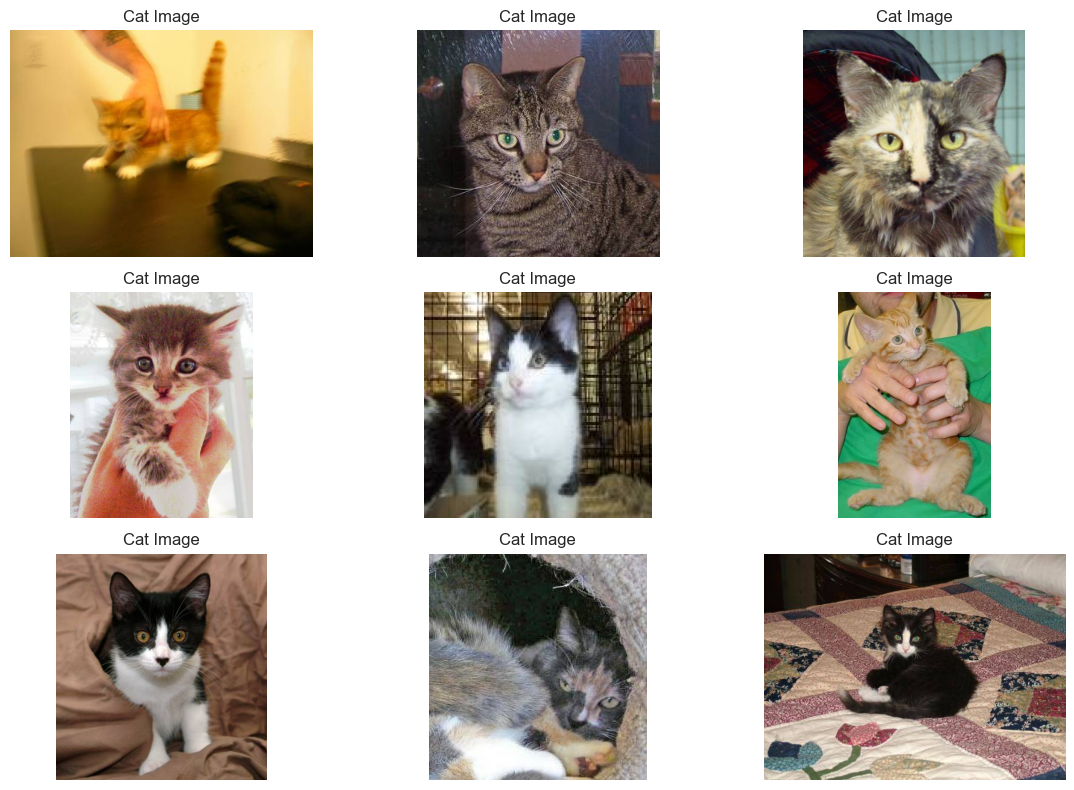

In [51]:
# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

### Paso 3: Construye una RNA

#### Verificamos que podemos usar nuestra GPU

In [52]:
print(tf.config.list_physical_devices('GPU'))
print("TensorFlow Version:", tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow Version: 2.10.1


#### Definimos nuestro train y test

In [ ]:
# Define a few rules for DataGen
train_dir = r"..\data\Train"
test_dir = r"..\data\Test"
image_size = (150, 150)

datagentrain = ImageDataGenerator()
datagentest  = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="categorical")

# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="categorical")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


### Definimos el modelo

In [54]:
model = Sequential()

# Block 1
model.add(Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

# Block 2
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

# Block 3
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

# Classifier
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

### Compilamos el modelo

In [55]:
# Compile the Model before Training
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics = ["accuracy"])

### CallBacks

In [56]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=5),
    ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True)
]

### Train

In [57]:
# TRAIN
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=50,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/50
625/625 [==============================] - 162s 243ms/step - loss: 0.6339 - accuracy: 0.6607 - val_loss: 0.5939 - val_accuracy: 0.6922 - lr: 1.0000e-04
Epoch 2/50
625/625 [==============================] - 151s 241ms/step - loss: 0.5382 - accuracy: 0.7303 - val_loss: 0.5038 - val_accuracy: 0.7600 - lr: 1.0000e-04
Epoch 3/50
625/625 [==============================] - 151s 241ms/step - loss: 0.4851 - accuracy: 0.7671 - val_loss: 0.4569 - val_accuracy: 0.7902 - lr: 1.0000e-04
Epoch 4/50
625/625 [==============================] - 151s 241ms/step - loss: 0.4280 - accuracy: 0.8061 - val_loss: 0.4661 - val_accuracy: 0.7862 - lr: 1.0000e-04
Epoch 5/50
625/625 [==============================] - 151s 241ms/step - loss: 0.3643 - accuracy: 0.8398 - val_loss: 0.3996 - val_accuracy: 0.8360 - lr: 1.0000e-04
Epoch 6/50
625/625 [==============================] - 151s 241ms/step - loss: 0.3035 - accuracy: 0.8700 - val_loss: 0.3262 - val_accuracy: 0.8630 - lr: 1.0000e-04
Epoch 7/50
625/625 [==

In [61]:
tf.keras.backend.clear_session()

### Data accuracy check

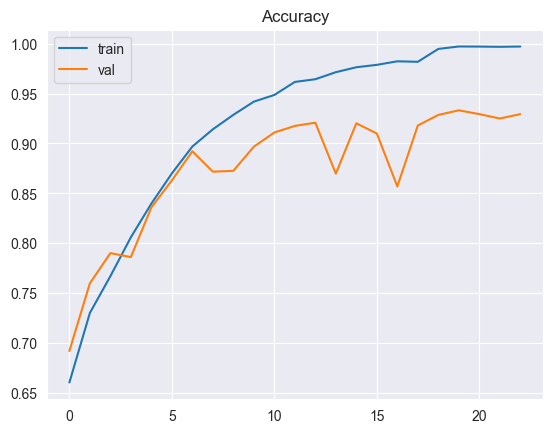

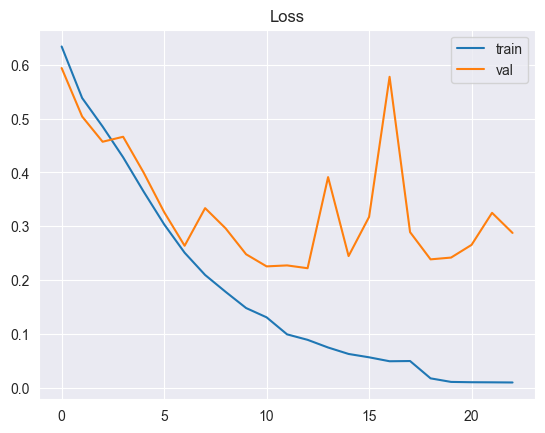

In [62]:
# PLOT ACCURACY & LOSS
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["train", "val"])
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.legend(["train", "val"])
plt.show()

# Plot
plt.show()

### Try to Predict the Images

In [4]:
img = image.load_img(r"..data\Test\Cats\cat.10000.jpg", target_size = (150, 150))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model(r"..models\best_model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")
    

NameError: name 'image' is not defined